In [2]:
import numpy as np
import pandas as pd 
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

%matplotlib inline

C:\Users\kajib\Anaconda3\patkajos812\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kajib\Anaconda3\patkajos812\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kajib\Anaconda3\patkajos812\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kajib\Anaconda3\patkajos812\lib\site-packages\tensorflow\pyth

In [3]:
df = pd.read_table('./df_cl',sep =',',low_memory=False)

In [4]:
df.head(2)

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
0,1,00000000000S702,1,6.0,1.0,04007,0.0,09,53.0,0.0,...,Y,5/9/2019,B,Z,0,100.0,0,G,7,145.50
1,1,00000000000S703,1,6.0,1.0,04003,0.0,09,53.0,3004.0,...,Y,5/9/2019,B,Z,0,100.0,0,G,7,133.28


In [5]:
df.drop(['STRUCTURE_NUMBER_008','STATE_CODE_001'], axis = 1 , inplace = True)

In [6]:
df.head(2)

,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,FACILITY_CARRIED_007,...,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
0,1,6.0,1.0,04007,0.0,09,53.0,0.0,'PERDIDO CREEK ','IRR BIA RTE 4007 ',...,Y,5/9/2019,B,Z,0,100.0,0,G,7,145.50
1,1,6.0,1.0,04003,0.0,09,53.0,3004.0,'PERDIDO CREEK ','IRR BIA RTE 4003 ',...,Y,5/9/2019,B,Z,0,100.0,0,G,7,133.28


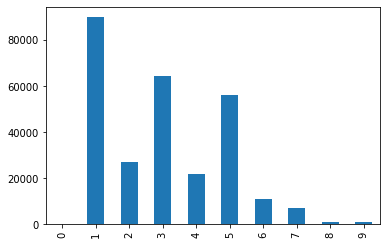

In [7]:
df['STRUCTURE_KIND_043A'].value_counts().sort_index().plot(kind='bar')

In [8]:
#m = [ i for i in df.columns if df[i].dtype == int]

In [9]:
 df['LAT_016']

0         31061094.0
1         31062020.0
2         32174330.0
3         34481800.0
4         34480000.0
             ...    
280369    18182996.0
280370    18224348.0
280371    18020896.0
280372    18144916.0
280373    18250840.0
Name: LAT_016, Length: 280374, dtype: float64

In [10]:
numerical_data = df.select_dtypes(np.number)

In [11]:
numerical_data.shape

(280374, 72)

In [12]:
numerical_data.columns 

Index(['RECORD_TYPE_005A', 'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C',
       'DIRECTION_005E', 'COUNTY_CODE_003', 'PLACE_CODE_004',
       'MIN_VERT_CLR_010', 'KILOPOINT_011', 'BASE_HWY_NETWORK_012', 'LAT_016',
       'LONG_017', 'DETOUR_KILOS_019', 'TOLL_020', 'MAINTENANCE_021',
       'OWNER_022', 'FUNCTIONAL_CLASS_026', 'YEAR_BUILT_027',
       'TRAFFIC_LANES_ON_028A', 'TRAFFIC_LANES_UND_028B', 'ADT_029',
       'YEAR_ADT_030', 'APPR_WIDTH_MT_032', 'MEDIAN_CODE_033',
       'DEGREES_SKEW_034', 'STRUCTURE_FLARED_035', 'HISTORY_037',
       'NAV_VERT_CLR_MT_039', 'NAV_HORR_CLR_MT_040', 'SERVICE_ON_042A',
       'SERVICE_UND_042B', 'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B',
       'APPR_KIND_044A', 'APPR_TYPE_044B', 'MAIN_UNIT_SPANS_045',
       'APPR_SPANS_046', 'HORR_CLR_MT_047', 'MAX_SPAN_LEN_MT_048',
       'STRUCTURE_LEN_MT_049', 'LEFT_CURB_MT_050A', 'RIGHT_CURB_MT_050B',
       'ROADWAY_WIDTH_MT_051', 'DECK_WIDTH_MT_052', 'VERT_CLR_OVER_MT_053',
       'VERT_CLR_UND_054B', 'LA

In [13]:
numerical_data.shape

(280374, 72)

In [14]:
X = numerical_data.drop('TOTAL_IMP_COST_096', axis = 1)
y = numerical_data['TOTAL_IMP_COST_096'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state = 42)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [15]:
model = Sequential()
model.add(Dense(71, # How many neurons do you want in your first layer.
                input_shape=(71,),
                activation='relu'))
model.add(Dense(64,
               activation ='relu',))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

Instructions for updating:
Use tf.cast instead.


In [17]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=20, batch_size=512)

Train on 187850 samples, validate on 92524 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
187850/187850 [==============================] - 1s 8us/sample - loss: 2641544577.4745 - mean_absolute_error: 4750.7705 - val_loss: 2854829228.5131 - val_mean_absolute_error: 5594.5288
Epoch 2/20
187850/187850 [==============================] - 1s 6us/sample - loss: 2253761298.7056 - mean_absolute_error: 7035.2778 - val_loss: 2194226446.9521 - val_mean_absolute_error: 8849.2832
Epoch 3/20
187850/187850 [==============================] - 1s 5us/sample - loss: 1616677155.1748 - mean_absolute_error: 8795.8613 - val_loss: 1429764988.4972 - val_mean_absolute_error: 8782.8340
Epoch 4/20
187850/187850 [==============================] - 1s 5us/sample - loss: 1032129084.8390 - mean_absolute_error: 7590.9819 - val_loss: 886777736.2258 - val_mean_absolute_error: 6447.5054
Epoch 5/20
187850/187850 [==============================] - 1s 6us/sample - loss: 686256863.6243 - mean_absolute_error

In [18]:
df_pred = pd.DataFrame(abs(model.predict(X_test_sc)))
df_pred.mean() 

0    4878.807129
dtype: float32

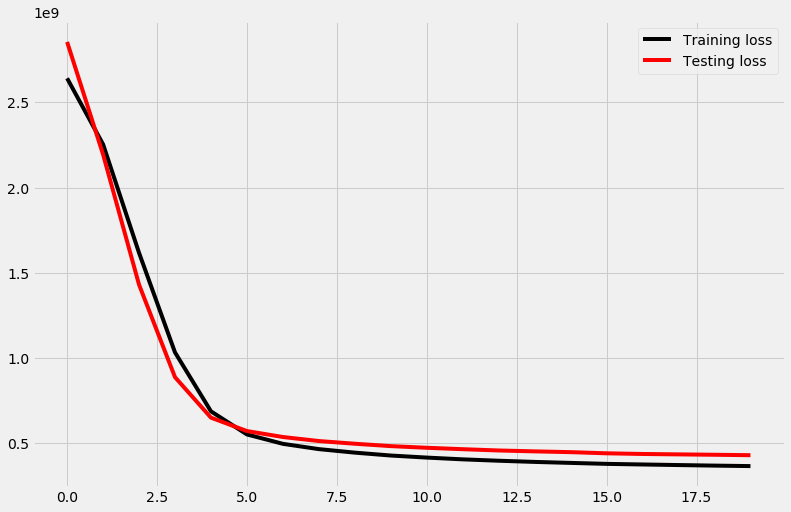

In [18]:

train_loss = history.history['loss']
plt.style.use('fivethirtyeight')
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='k')
plt.plot(test_loss, label='Testing loss', color='r')
plt.legend();
plt.savefig('neural')